In [11]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv('./train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0.0,NaN,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021,1,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563,1,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615,1,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821,1,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0
1996,1965,1,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2
1997,1911,0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3
1998,1512,0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0


In [13]:
df[950:1050]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
950,1382,1,0.5,0.0,7.0,1.0,13.0,0.3,199.0,2.0,...,612.0,719.0,2073.0,16.0,7.0,9.0,1.0,0.0,1.0,1
951,633,1,1.4,0.0,0.0,1.0,46.0,0.7,102.0,6.0,...,709.0,1915.0,1401.0,19.0,14.0,11.0,1.0,1.0,0.0,1
952,1444,1,2.1,0.0,9.0,0.0,38.0,0.4,104.0,7.0,...,624.0,917.0,3764.0,14.0,9.0,10.0,0.0,0.0,0.0,3
953,852,1,1.6,1.0,6.0,1.0,54.0,0.4,147.0,5.0,...,538.0,730.0,1275.0,13.0,7.0,12.0,1.0,0.0,1.0,0
954,922,1,0.7,0.0,0.0,1.0,47.0,1.0,157.0,8.0,...,1295.0,1808.0,1464.0,17.0,4.0,12.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,531,0,1.1,0.0,10.0,0.0,63.0,0.7,189.0,7.0,...,145.0,1903.0,2958.0,17.0,1.0,19.0,0.0,1.0,0.0,2
1046,1057,0,2.1,0.0,4.0,0.0,5.0,0.5,154.0,5.0,...,416.0,1055.0,3705.0,6.0,4.0,13.0,1.0,0.0,0.0,3
1047,576,0,1.2,0.0,1.0,0.0,30.0,0.8,162.0,8.0,...,847.0,893.0,2800.0,11.0,6.0,16.0,0.0,1.0,1.0,2
1048,1960,1,2.1,0.0,1.0,0.0,7.0,0.2,165.0,7.0,...,868.0,877.0,3773.0,11.0,9.0,6.0,0.0,1.0,1.0,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1982 non-null   float64
 4   fc             1971 non-null   float64
 5   four_g         1975 non-null   float64
 6   int_memory     1983 non-null   float64
 7   m_dep          1982 non-null   float64
 8   mobile_wt      1979 non-null   float64
 9   n_cores        1982 non-null   float64
 10  pc             1988 non-null   float64
 11  px_height      1983 non-null   float64
 12  px_width       1982 non-null   float64
 13  ram            1979 non-null   float64
 14  sc_h           1973 non-null   float64
 15  sc_w           1982 non-null   float64
 16  talk_time      1985 non-null   float64
 17  three_g        1991 non-null   float64
 18  touch_sc

In [15]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,1991.000000,1982.000000,1971.000000,1975.000000,1983.000000,1982.000000,1979.000000,1982.000000,...,1983.000000,1982.000000,1979.000000,1973.000000,1982.000000,1985.000000,1991.000000,1991.000000,1994.000000,2000.000000
mean,1238.518500,0.4950,1.520844,0.510595,4.307458,0.518987,32.023197,0.502119,140.152602,4.523713,...,644.248613,1251.116044,2124.439111,12.305119,5.767407,11.014610,0.760422,0.502762,0.506520,1.500000
std,439.418206,0.5001,0.816151,0.500014,4.345818,0.499766,18.155108,0.288332,35.358355,2.286451,...,443.650210,431.670630,1084.156457,4.213154,4.363342,5.466198,0.426933,0.500118,0.500083,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,281.000000,874.250000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,945.500000,1630.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
df.isna().sum()

battery_power     0
blue              0
clock_speed       9
dual_sim         18
fc               29
four_g           25
int_memory       17
m_dep            18
mobile_wt        21
n_cores          18
pc               12
px_height        17
px_width         18
ram              21
sc_h             27
sc_w             18
talk_time        15
three_g           9
touch_screen      9
wifi              6
price_range       0
dtype: int64

In [17]:
df.isnull().sum()/df.shape[0] * 100
#represents the percentage of null values

battery_power    0.00
blue             0.00
clock_speed      0.45
dual_sim         0.90
fc               1.45
four_g           1.25
int_memory       0.85
m_dep            0.90
mobile_wt        1.05
n_cores          0.90
pc               0.60
px_height        0.85
px_width         0.90
ram              1.05
sc_h             1.35
sc_w             0.90
talk_time        0.75
three_g          0.45
touch_screen     0.45
wifi             0.30
price_range      0.00
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1982 non-null   float64
 4   fc             1971 non-null   float64
 5   four_g         1975 non-null   float64
 6   int_memory     1983 non-null   float64
 7   m_dep          1982 non-null   float64
 8   mobile_wt      1979 non-null   float64
 9   n_cores        1982 non-null   float64
 10  pc             1988 non-null   float64
 11  px_height      1983 non-null   float64
 12  px_width       1982 non-null   float64
 13  ram            1979 non-null   float64
 14  sc_h           1973 non-null   float64
 15  sc_w           1982 non-null   float64
 16  talk_time      1985 non-null   float64
 17  three_g        1991 non-null   float64
 18  touch_sc

In [19]:
import matplotlib.pyplot as plt

NameError: name 'sns' is not defined

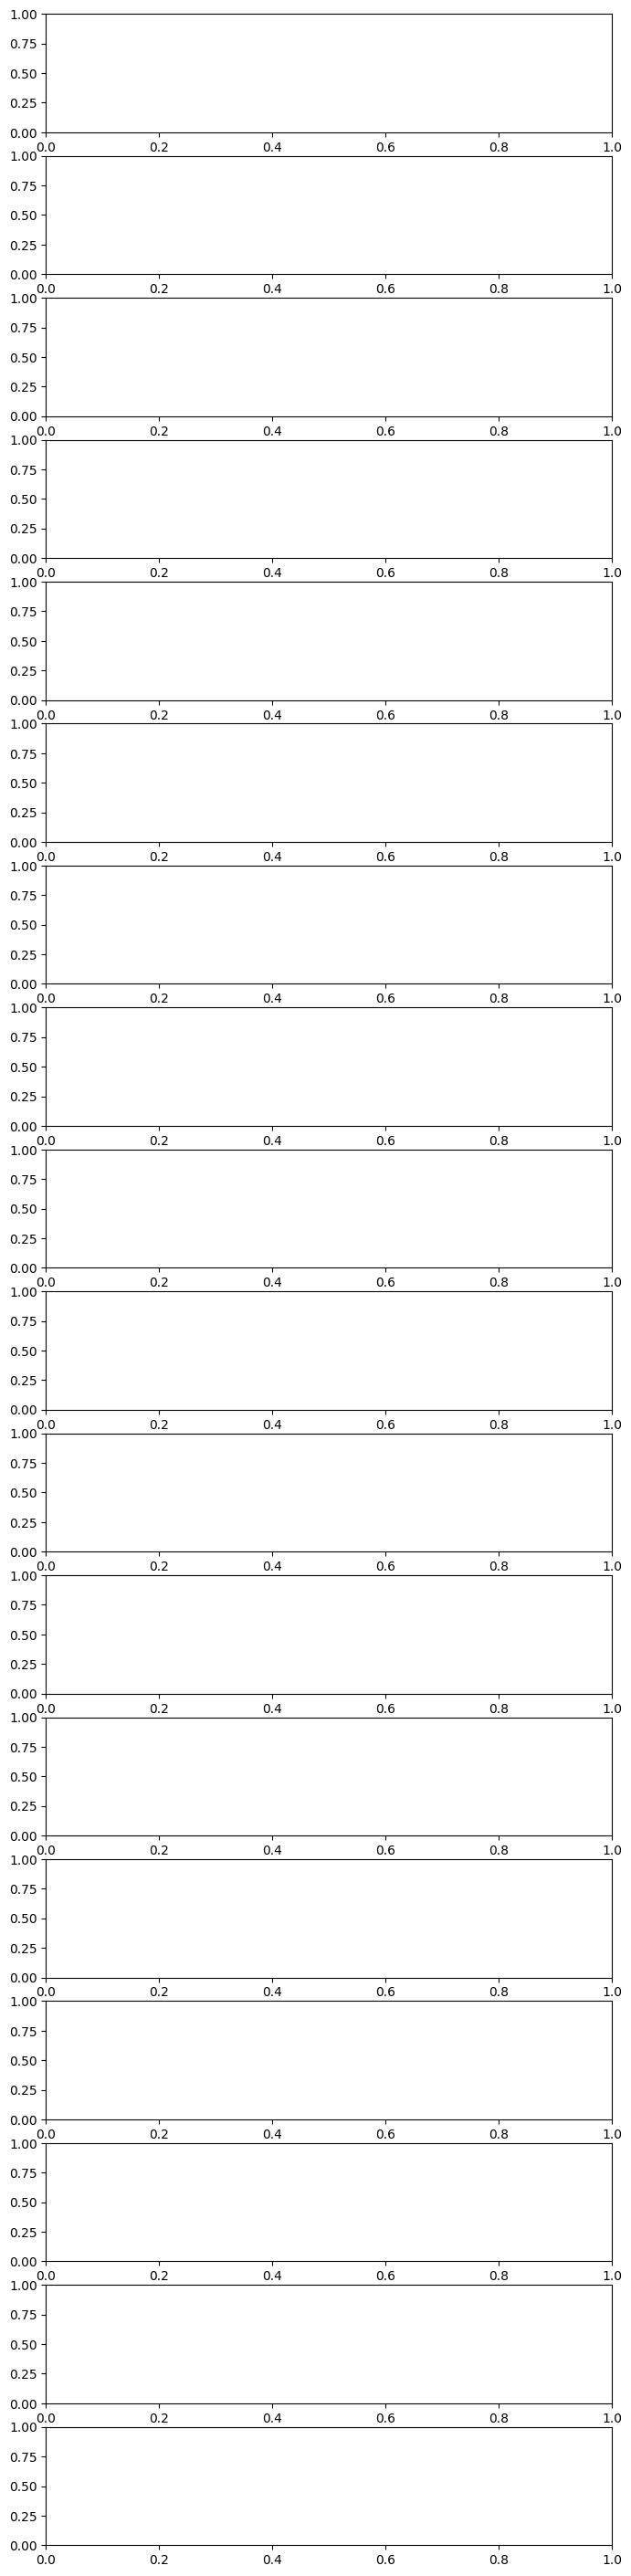

In [20]:
features_to_plot = ['clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(8, 2 * len(features_to_plot)))

# Plot histograms for each feature
for i, feature in enumerate(features_to_plot):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [21]:
skewness=df.skew()
skewness

battery_power    0.031898
blue             0.020016
clock_speed      0.180232
dual_sim        -0.042423
fc               1.022288
four_g          -0.076062
int_memory       0.059443
m_dep            0.087083
mobile_wt        0.008932
n_cores          0.003211
pc               0.019455
px_height        0.663989
px_width         0.013353
ram              0.005373
sc_h            -0.096529
sc_w             0.630893
talk_time        0.010172
three_g         -1.221192
touch_screen    -0.011058
wifi            -0.026100
price_range      0.000000
dtype: float64

For normalized ones we replace with mean and others with median.

**taking 0.5 as skew_threshold**

Considering columns with |skewness| > 0.5 as skewed and |skewness| < 0.5 as normalized

Replacing the following columns with their respective mean/median values

 **median** -> fc, px_height, sc_w, three_g
 
 **mean** -> clock_speed, dual_sim, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_width, ram, sc_h, talk_time, touch_screen, wifi



In [22]:
replace_columns=features_to_plot

skew_threshold = 0.5

for col in replace_columns:
    if df[col].isnull().any():  #check if at least one True is present in the Boolean mask
        if abs(skewness[col]) > skew_threshold:
            # highly-skewed data, replace with median
            df[col].fillna(df[col].median(), inplace=True)
        elif abs(skewness[col]) < skew_threshold:
            # normalized data, replace with mean
            df[col].fillna(df[col].mean(), inplace=True)


In [23]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:
y=df['price_range']
X=df.drop('price_range', axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0.0,3.0,0.0,7.0,0.6,188.0,2.000000,2.0,20.0,756.0,2549.000000,9.0,7.0,19.0,0.0,0.0,1.0
1,1021,1,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.000000,6.0,905.0,1988.0,2631.000000,17.0,3.0,7.0,1.0,1.0,0.0
2,563,1,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.000000,6.0,1263.0,1716.0,2603.000000,11.0,2.0,9.0,1.0,1.0,0.0
3,615,1,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.000000,9.0,1216.0,1786.0,2769.000000,16.0,8.0,11.0,1.0,0.0,0.0
4,1821,1,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.000000,14.0,1208.0,1212.0,1411.000000,8.0,2.0,15.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.000000,14.0,1222.0,1890.0,668.000000,13.0,4.0,19.0,1.0,1.0,0.0
1996,1965,1,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.000000,3.0,915.0,1965.0,2032.000000,11.0,10.0,16.0,1.0,1.0,1.0
1997,1911,0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.000000,3.0,868.0,1632.0,3057.000000,9.0,1.0,5.0,1.0,1.0,0.0
1998,1512,0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.000000,5.0,336.0,670.0,869.000000,18.0,10.0,19.0,1.0,1.0,1.0


# Data Exploration / Analysis

Let us check the correlation between the values to the phone's price range.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

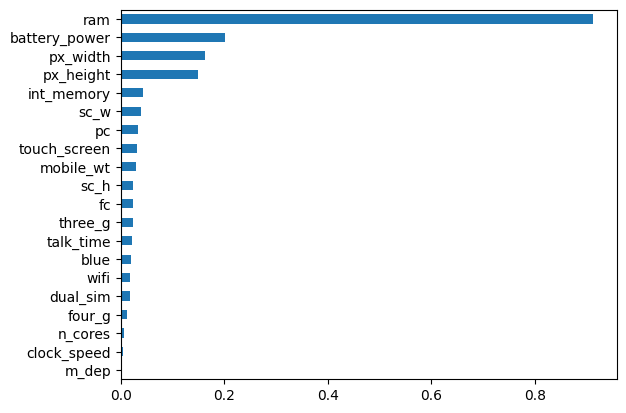

In [26]:
corr_arr = []
name_arr = []


for col in range(len(df.columns)):
    if df.columns[col] == "price_range":
        continue

    name_arr.append(df.columns[col])

    corr = df.corr()["price_range"][col]
    if corr < 0: corr *= -1
    corr_arr.append(corr)

pd.Series(corr_arr, name_arr).sort_values().plot(kind="barh")

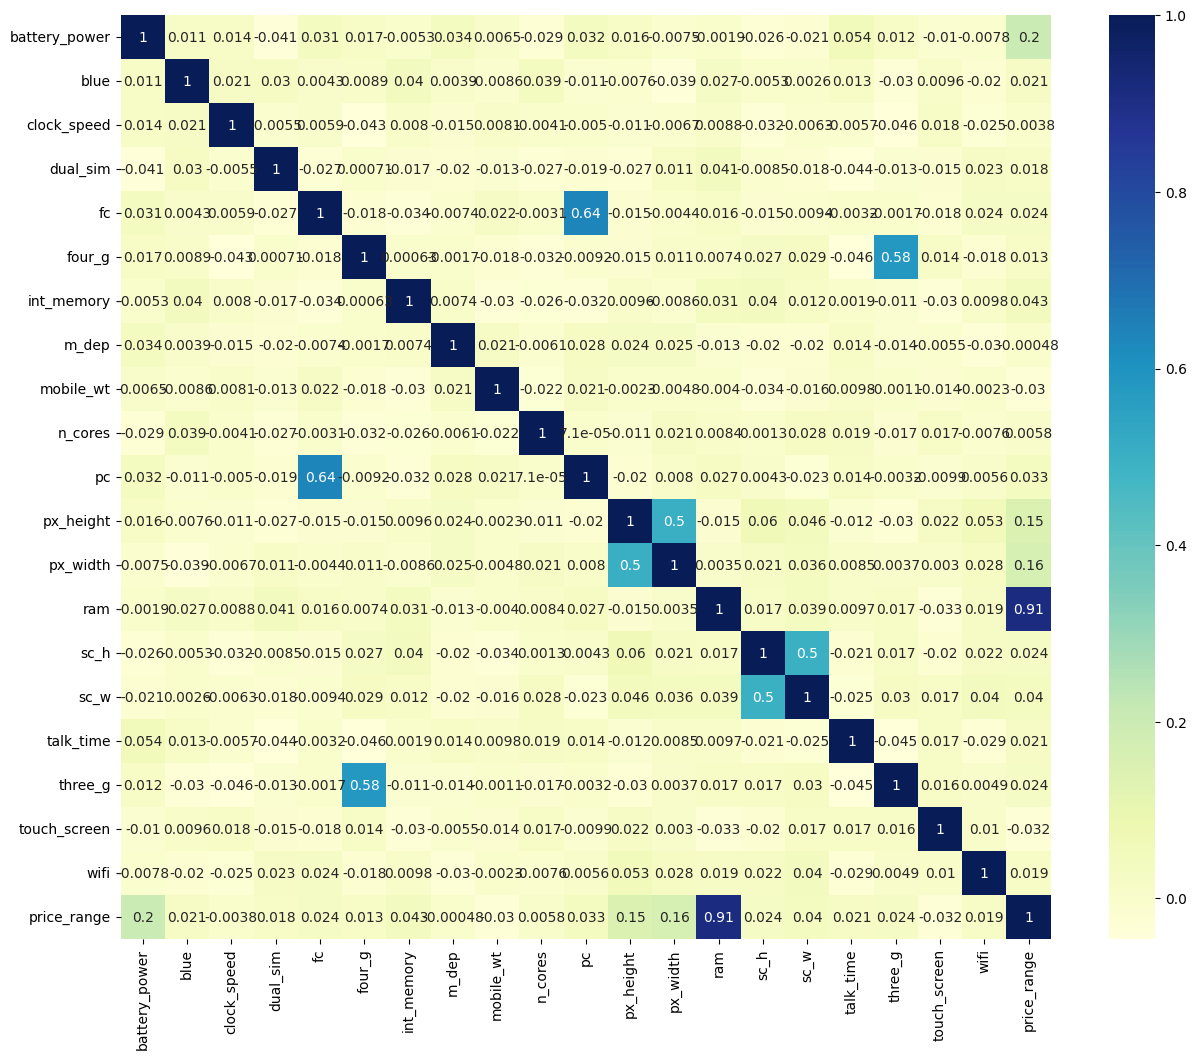

In [27]:
plt.figure(figsize=(15,12))
r = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

These values have the highest correlation to price:

ram

battery power

screen dimensions

internal memory

### How Ram affects price

<Axes: xlabel='price_range', ylabel='ram'>

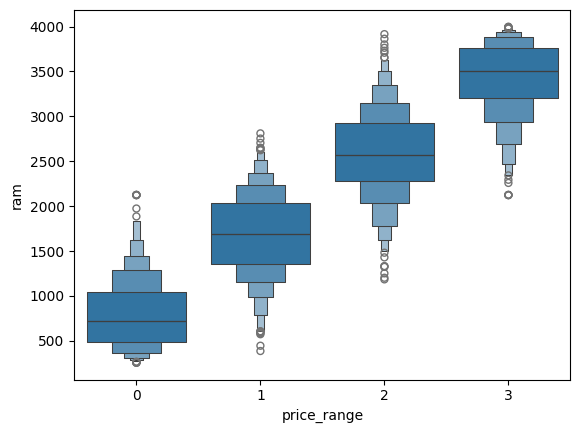

In [28]:
sns.boxenplot(data=df, y="ram", x="price_range")

<Axes: xlabel='price_range', ylabel='ram'>

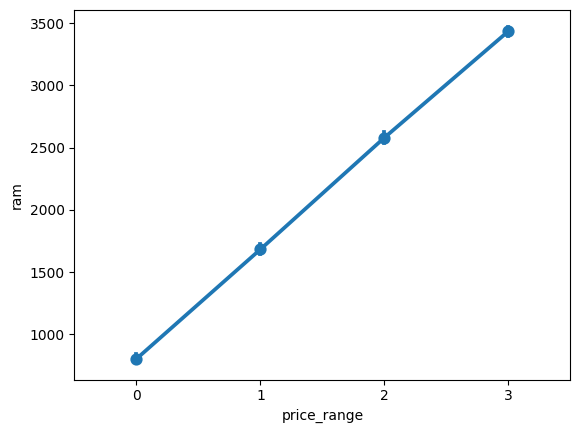

In [29]:
sns.pointplot(data=df, y="ram", x="price_range")

We can see as the ram goes higher, so does the price range. Ram greatly affects the price of the mobile device.

### How Internal Memory affects price range

<Axes: xlabel='price_range', ylabel='int_memory'>

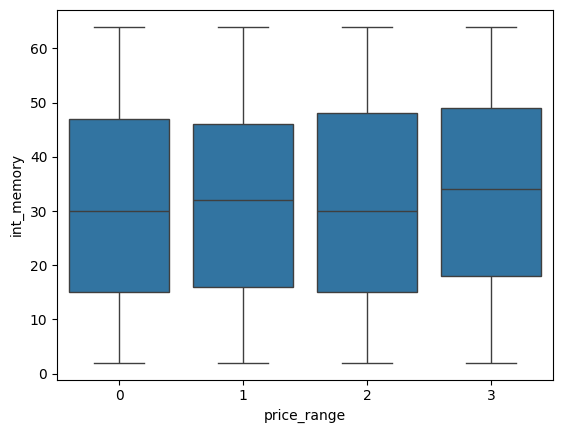

In [30]:
sns.boxplot(data=df, y="int_memory", x="price_range")

<Axes: xlabel='price_range', ylabel='int_memory'>

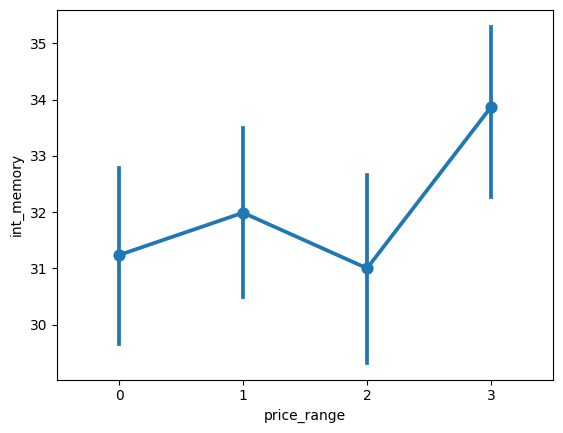

In [31]:
sns.pointplot(data=df, y="int_memory", x="price_range")

The price range seems to dip for price range 2

### How Battery power affects price range

<Axes: xlabel='price_range', ylabel='battery_power'>

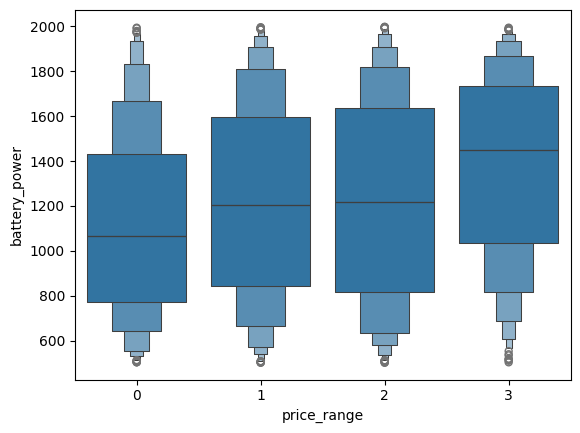

In [32]:
sns.boxenplot(data=df, y="battery_power", x="price_range")

<Axes: xlabel='price_range', ylabel='battery_power'>

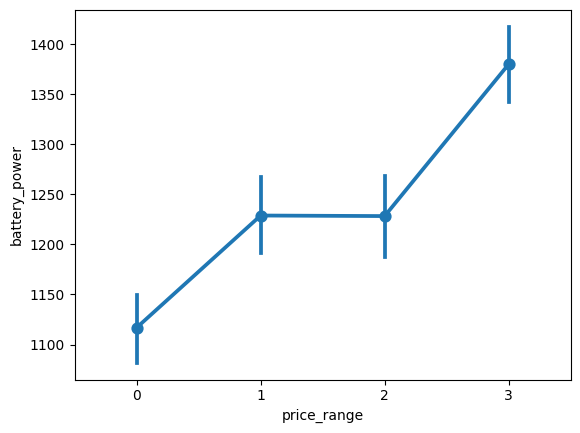

In [33]:
sns.pointplot(data=df, y="battery_power", x="price_range")

Battery power affects price range

# Machine Learning

Split Dataset

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
437,1472,0,2.8,1.0,1.0,0.0,36.0,0.5,130.0,6.0,10.0,1452.0,1744.0,985.000000,12.0,11.0,7.0,1.0,1.0,0.0
17,595,0,0.9,1.0,7.0,1.0,23.0,0.1,121.0,3.0,17.0,441.0,810.0,3752.000000,10.0,2.0,18.0,1.0,1.0,0.0
761,558,1,2.8,0.0,1.0,1.0,49.0,0.8,142.0,5.0,4.0,997.0,1605.0,392.000000,10.0,5.0,8.0,1.0,1.0,1.0
1779,1807,1,2.9,0.0,0.0,0.0,16.0,0.2,125.0,3.0,0.0,1221.0,1415.0,2921.000000,8.0,5.0,17.0,0.0,1.0,0.0
861,525,0,2.4,1.0,11.0,0.0,35.0,0.8,190.0,7.0,20.0,82.0,670.0,1609.000000,16.0,11.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,787,1,0.5,0.0,15.0,0.0,11.0,0.6,93.0,1.0,16.0,806.0,1423.0,2934.000000,8.0,6.0,14.0,1.0,0.0,1.0
205,765,0,0.5,1.0,0.0,1.0,47.0,0.3,115.0,8.0,1.0,1277.0,1429.0,2124.439111,11.0,7.0,4.0,1.0,0.0,1.0
198,609,0,0.5,0.0,3.0,0.0,26.0,0.3,93.0,4.0,4.0,938.0,1948.0,1866.000000,11.0,10.0,14.0,1.0,1.0,1.0
1648,645,0,2.5,0.0,10.0,1.0,63.0,1.0,174.0,4.0,14.0,278.0,584.0,2124.439111,18.0,8.0,13.0,1.0,0.0,1.0


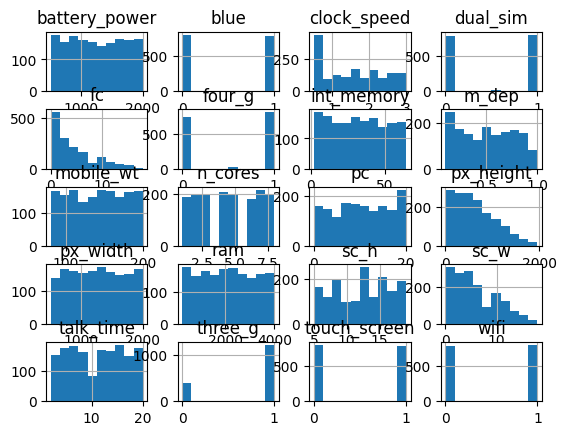

In [35]:
X_train.hist();

### Scaling the data

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error

linreg_prediction = linreg.predict(X_test)
mse = mean_squared_error(y_test, linreg_prediction)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.12194494789250371


In [39]:
from sklearn.metrics import accuracy_score

# Convert regression predictions to classes
linreg_class_predictions = [round(pred) for pred in linreg_prediction]

# Calculate accuracy
linreg_acc = accuracy_score(y_test, linreg_class_predictions)
print(f"Accuracy: {linreg_acc * 100:.2f}%")


Accuracy: 88.00%


### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=5000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [41]:
from sklearn.metrics import accuracy_score

lg_prediction = lg.predict(X_test)
lg_acc = accuracy_score(y_test, lg_prediction)
print(str(round(lg_acc * 10000) / 100) + "% Accuracy")

93.5% Accuracy


### XGBoost

In [42]:
import xgboost as xgb

# Initialize the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Adjust hyperparameters (n_estimators, learning_rate, max_depth) as needed

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)


In [43]:
# Evaluate the model
from sklearn.metrics import accuracy_score
XGB_acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {XGB_acc*100}%")

Accuracy: 90.0%


### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
from sklearn.metrics import accuracy_score

forest_prediction = forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_prediction)
print(str(round(forest_acc * 10000) / 100) + "% Accuracy")

86.5% Accuracy


### Comparison of Models

We will now compare the scores of the models

In [46]:
model_scores = {"Linear Regression": linreg_acc, "Logistic Regression": lg_acc, "Random Forest Classifier": forest_acc, "XGBoost": XGB_acc}
pd.DataFrame.from_dict(model_scores, orient="index", columns=["Score"])

,Score
Linear Regression,0.880
Logistic Regression,0.935
Random Forest Classifier,0.865
XGBoost,0.900


# Running the model on test dataset

In [47]:
test_df = pd.read_csv("./test.csv")

In [48]:
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [49]:
test_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Since there is not any null values present in th dataset, therefore the data is already processed

In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load and preprocess the test data
test_df = pd.read_csv('test.csv')  # Replace 'test.csv' with the actual path

# Assuming 'X_train' and 'y_train' contain the features and labels used during training
# Ensure the number of features matches between training and test data
if X_train.shape[1] != test_df.shape[1]:
    print("Number of features does not match between training and test data.")
else:
    # Use the same scaler you used during training
    scaler = StandardScaler()

    # Assuming you applied fit_transform on 'X_train'
    X_train_scaled = scaler.fit_transform(X_train)

    # Apply the same scaler transformation to the test data
    test_df_processed = scaler.transform(test_df)

    # Create and train the logistic regression model
    logreg = LogisticRegression()
    logreg.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data

    # Make predictions using the trained logistic regression model
    logreg_predictions = logreg.predict(test_df_processed)

    # Add the predicted price_range values to a new column in the test_df DataFrame
    test_df['predicted_price_range'] = logreg_predictions



c:\Users\2shas\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [54]:
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,3
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,3
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,3
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,3


In [55]:
test_df['predicted_price_range'].unique()

array([3], dtype=int64)